In [28]:
import pandas as pd
import numpy as np
import random

In [143]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
original_test = pd.read_csv('original_test.csv')

Creating Categorical Values

In [3]:
previous_employers = pd.get_dummies(data['No_of_previous_employers'], drop_first = True)
intra_dept_movement = pd.get_dummies(data['Previous_IntraDepartmental_Movement'], drop_first = True)
disciplinary_action = pd.get_dummies(data['Past_Disciplinary_Action'], drop_first = True)
status = pd.get_dummies(data['Marital_Status'], drop_first = True)
foreign = pd.get_dummies(data['Foreign_schooled'], drop_first = True)
state = pd.get_dummies(data['State_Of_Origin'], drop_first = True)
chnrecuit = pd.get_dummies(data['Channel_of_Recruitment'], drop_first = True)
qualification = pd.get_dummies(data['Qualification'], drop_first = True)
gender = pd.get_dummies(data['Gender'], drop_first = True)
division = pd.get_dummies(data['Division'], drop_first = True)

In [4]:
data = pd.concat([data, division, gender, qualification, chnrecuit, state, foreign, status, disciplinary_action,intra_dept_movement, previous_employers],axis = 1 )

In [5]:
data.drop(columns = ['Division','Qualification','Gender','Channel_of_Recruitment','State_Of_Origin','Foreign_schooled','Marital_Status','Past_Disciplinary_Action','Previous_IntraDepartmental_Movement', 'No_of_previous_employers','remove'], axis = 1, inplace =True)

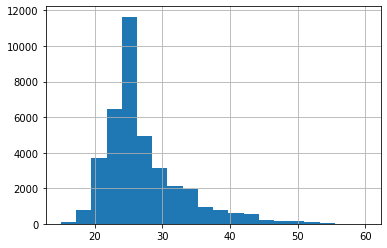

In [152]:
data['age_at_recruitment'].hist(bins = 20)

In [7]:
X =  data.drop(columns = ['Promoted_or_Not'])
y = data.iloc[:,7]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

In [315]:
classifier = LogisticRegression(C = 0.0001, solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.00005)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=5e-05, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [316]:
predictions = classifier.predict(X_test)

In [331]:
classifier.score(X_train, y_train)*100

91.46841673502871

In [318]:
classifier.score(X_test, y_test)*100

91.70871759178702

In [319]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
accuracy * 100

91.70871759178702

In [320]:
test = pd.read_csv('test.csv')
test['age_at_requirement'] = test['Year_of_recruitment'] - test['Year_of_birth']

In [321]:
previous_employers_test = pd.get_dummies(test['No_of_previous_employers'], drop_first = True)
intra_dept_movement_test = pd.get_dummies(test['Previous_IntraDepartmental_Movement'], drop_first = True)
disciplinary_action_test = pd.get_dummies(test['Past_Disciplinary_Action'], drop_first = True)
status_test = pd.get_dummies(test['Marital_Status'], drop_first = True)
foreign_test = pd.get_dummies(test['Foreign_schooled'], drop_first = True)
state_test = pd.get_dummies(test['State_Of_Origin'], drop_first = True)
chnrecuit_test = pd.get_dummies(test['Channel_of_Recruitment'], drop_first = True)
qualification_test = pd.get_dummies(test['Qualification'], drop_first = True)
gender_test = pd.get_dummies(test['Gender'], drop_first = True)
division_test = pd.get_dummies(test['Division'], drop_first = True)

In [322]:
test.drop(columns = ['EmployeeNo','Gender','Division','Qualification','Channel_of_Recruitment','State_Of_Origin','Foreign_schooled','Marital_Status','Past_Disciplinary_Action','Previous_IntraDepartmental_Movement','No_of_previous_employers'], inplace = True)

In [323]:
test = pd.concat([test, division_test, gender_test, qualification_test, chnrecuit_test, state_test, foreign_test, status_test, disciplinary_action_test,intra_dept_movement_test, previous_employers_test],axis = 1 )

In [324]:
test = sc.fit_transform(test)

In [325]:
y_pred = classifier.predict(test)

In [326]:
y_new_test = data['Promoted_or_Not'][0:16496]

In [327]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_new_test,y_pred)
accuracy * 100

91.63433559650824

In [328]:
y_pred
np.reshape(y_pred,(-1,1))

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [329]:
submit = {
    'EmployeeNo' : original_test.EmployeeNo,
    'Promoted_or_Not': y_pred
}
file = pd.DataFrame(data = submit)
file.to_csv('Final_Submission.csv', index=False)